In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime as dt
import numpy as np
from scipy.interpolate import splrep, BSpline

##### Açelya Deniz Güngördü

### 1) Create a plot using Matplotlib

In [2]:
def z_func(x,y):
     return np.sin(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)
    

In [3]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

x_mesh,y_mesh=np.meshgrid(x,y)

z_mesh=z_func(x_mesh,y_mesh)
z=z_func(x,y)

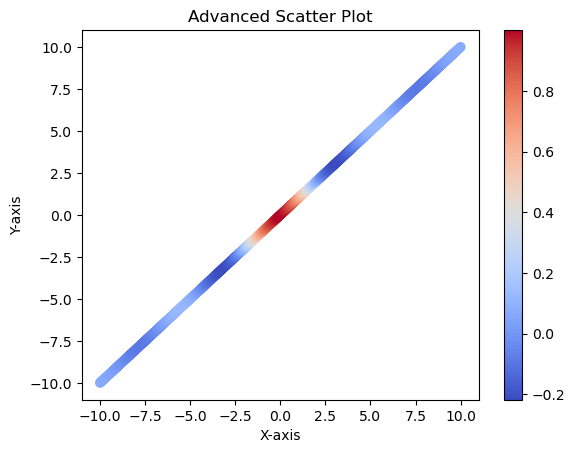

In [4]:
plt.scatter(x, y, c=z, cmap='coolwarm')
plt.colorbar()
plt.title("Advanced Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig("advanced_scatter_plot.png", dpi=300)
plt.show()

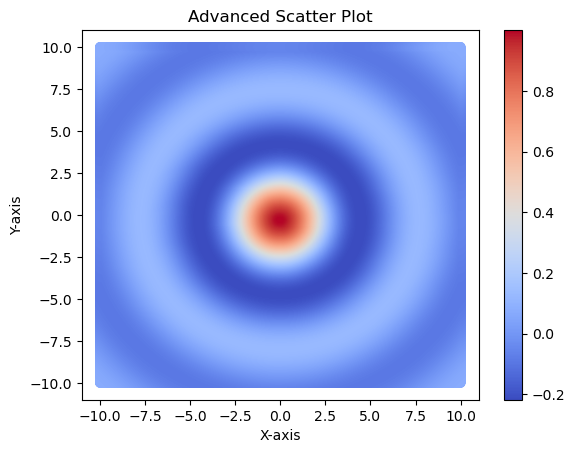

In [5]:
plt.scatter(x_mesh, y_mesh, c=z_mesh, cmap='coolwarm')
plt.colorbar()
plt.title("Advanced Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig("advanced_scatter_plot.png", dpi=300)
plt.show()

### 2)

1- First, explain thoroughly which one you think is better; the left or the right. And why!  

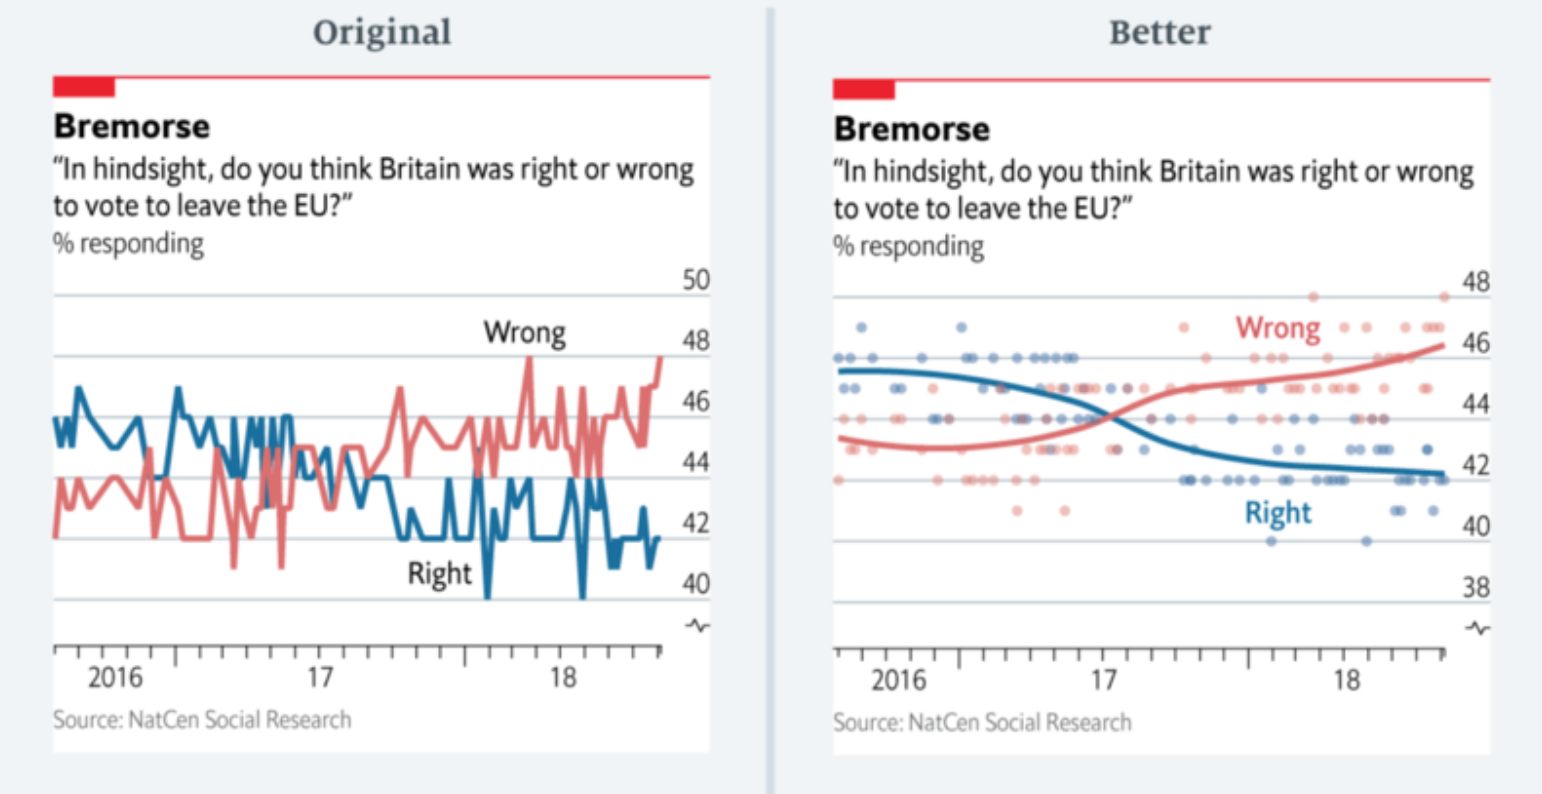

Examining the data, it seems that respondents' perceptions of the referendum outcome **fluctuated** a lot, showing occasional increases and decreases of a few percentage points from one week to another. I prefer on the right one because it provides clearer insight about the data  and seems more sophsiticated also publishable.

In [6]:
df=pd.read_csv("brexit.csv")

#### Data Cleaning

In [7]:
df["Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?"]

0     Source: NatCen Social Research
1                                NaN
2                               Date
3                           02/08/16
4                           09/08/16
                   ...              
83                          13/08/18
84                          14/08/18
85                          21/08/18
86                          29/08/18
87                          04/09/18
Name: Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?, Length: 88, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?  87 non-null     object
 1   Unnamed: 1                                                                                86 non-null     object
 2   Unnamed: 2                                                                                86 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [9]:
df.isna().sum()

Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?    1
Unnamed: 1                                                                                  2
Unnamed: 2                                                                                  2
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df=df.reset_index()

In [12]:
df=df.drop(["index"],axis=1)

In [13]:
df.head()

,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Date,% responding right,% responding wrong
1,02/08/16,46,42
2,09/08/16,45,44
3,17/08/16,46,43
4,23/08/16,45,43


In [14]:
df_full=df.drop(0)

In [15]:
df_full.columns=["time","Right","Wrong"]

In [16]:
df_full

,time,Right,Wrong
1,02/08/16,46,42
2,09/08/16,45,44
3,17/08/16,46,43
4,23/08/16,45,43
5,31/08/16,47,44
...,...,...,...
81,13/08/18,43,47
82,14/08/18,43,45
83,21/08/18,41,47
84,29/08/18,42,47


In [17]:
df_full['time'] = pd.to_datetime(df_full["time"])

In [18]:
df_full["Right"].sort_values(ascending=False)

5     47
13    47
1     46
29    46
24    46
      ..
75    41
77    41
83    41
54    40
69    40
Name: Right, Length: 85, dtype: object

#### Interpolation for smooth lines

We will do a spline interpolation for smootlines on the plot

In [19]:
df_full = df_full.sort_values(by="time").reset_index(drop=True)

In [20]:
df_full["ts"] = df_full["time"].values.astype(np.int64)

In [21]:
ts = df_full["ts"].values

In [22]:
r  = df_full["Right"].values
w = df_full["Wrong"].values

In [23]:
tck_right = splrep(ts,r,s=int(1.5*len(ts)))
tck_wrong = splrep(ts,w,s=int(1.5*len(ts)))

#### Plotting

Text(2018-02-10 00:00:00, 40, 'Right')

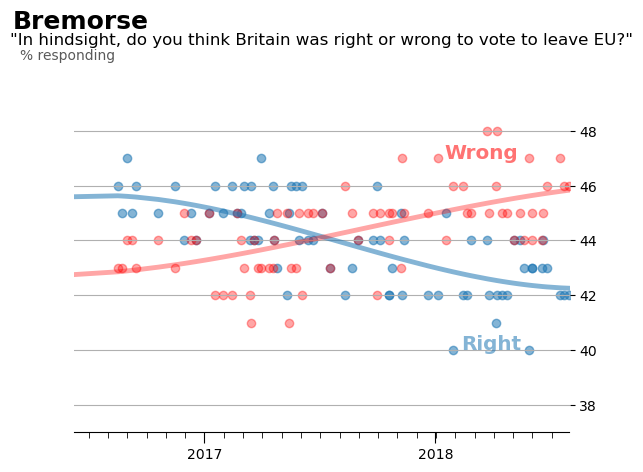

In [24]:
# Convert data to numerical values
df_full["Right"] = df_full["Right"].astype(float)
df_full["Wrong"] = df_full["Wrong"].astype(float)



fig, ax = plt.subplots()
ax.scatter(df_full["time"],df_full["Right"],alpha=0.55,label='Right')
ax.scatter(df_full["time"],df_full["Wrong"],alpha=0.35,color="red",label='Wrong')
ax.plot(df_full["time"],BSpline(*tck_right)(ts),alpha=0.55,label='Right L',lw=3.5)
ax.plot(df_full["time"],BSpline(*tck_wrong)(ts),alpha=0.35,color="red",label='Wrong L',lw=3.5)

ax.yaxis.tick_right()
ax.yaxis.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.suptitle('Bremorse', x=0.03, y=0.99, horizontalalignment='left', verticalalignment='top', fontsize=18, weight='bold')
plt.title('"In hindsight, do you think Britain was right or wrong to vote to leave EU?"', y=1.025) # Adjusted the y value and added quotes
plt.ylabel("% responding", loc='top', rotation=0, alpha=0.65, labelpad=-30) # Adjust labelpad to align with titles


# Set major locator for years
ax.xaxis.set_major_locator(mdates.YearLocator())

# Set minor locator for smaller ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(12))

start_date = dt.datetime(2016, 6 , 8)
end_date = dt.datetime(2018, 8, 1)
ax.set_xlim(start_date, end_date)

# Adjust tick parameters for better visualization (optional)
ax.tick_params(axis='x', which='major', size=8) # Increase the size of major ticks
ax.tick_params(axis='x', which='minor', size=4) # Decrease the size of minor ticks

#ax.set_xticks([dt.datetime(2016, 6, 1),dt.datetime(2017,  6 , 1),dt.datetime(2018,  6 , 1)],["2016","17","18"])
#y_min = min(df_full["ans_right"].min(), df_full["ans_wrong"].min())
#y_max = max(df_full["ans_right"].max(), df_full["ans_wrong"].max())


# Generate list of even numbers for y-axis ticks
#even_numbers = list(range(48, 39, -2))
#y_ticks = list(range(int(y_min), int(y_max) + 1, 2))

plt.ylim(37, 50.5)
plt.yticks(range(38, 49, 2))

#ax.legend()

# Set y-axis ticks to show only even numbers
#ax.set_xticks([dt.datetime(2016, 6, 1),dt.datetime(2017, 1, 1),dt.datetime(2018, 1, 1)],["2016","2017","2018"])
plt.text(dt.datetime(2018, 1, 15),47,s="Wrong",fontsize="x-large",color="red",fontweight="demibold",alpha=0.55)
plt.text(dt.datetime(2018, 2, 10),40,s="Right",fontsize="x-large",color="#1f77b4",fontweight="demibold",alpha=0.55)

In [25]:
df_full['id'] = range(1, len(df_full) + 1)

In [26]:
data = df_full.melt(id_vars=['time', 'id'], var_name='response', value_name='percent')


In [27]:
data

,time,id,response,percent
0,2016-02-08,1,Right,4.600000e+01
1,2016-05-12,2,Right,4.400000e+01
2,2016-08-17,3,Right,4.600000e+01
3,2016-08-23,4,Right,4.500000e+01
4,2016-08-31,5,Right,4.700000e+01
...,...,...,...,...
250,2018-09-07,81,ts,1.536278e+18
251,2018-09-08,82,ts,1.536365e+18
252,2018-10-04,83,ts,1.538611e+18
253,2018-11-07,84,ts,1.541549e+18


/var/folders/lx/n6yjq7px2bbb1_0ykd18bk100000gn/T/ipykernel_97907/1022851596.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='time', y='percent', hue='response', data=data,alpha=0.55,legend=False , linewidth=3.5,palette=[ "#1f77b4", 'red'])


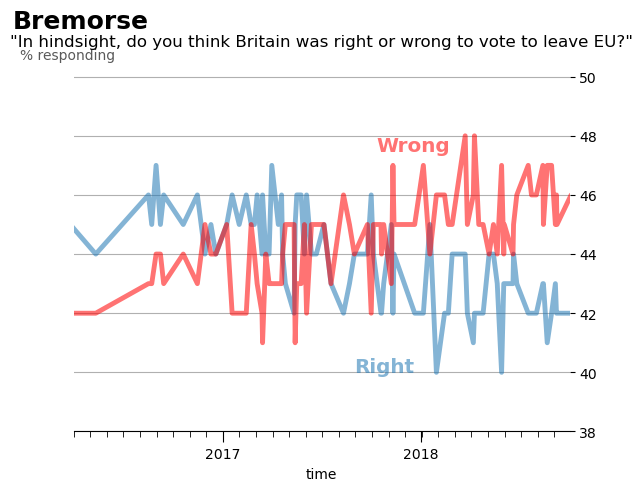

In [32]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='percent', hue='response', data=data,alpha=0.55,legend=False , linewidth=3.5,palette=[ "#1f77b4", 'red'])
plt.ylim(38, 50.5)
plt.yticks(range(38, 51, 2))
ax.yaxis.tick_right()
ax.yaxis.grid()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Set major locator for years
ax.xaxis.set_major_locator(mdates.YearLocator())

# Set minor locator for smaller ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(12))

plt.suptitle('Bremorse', x=0.03, y=0.99, horizontalalignment='left', verticalalignment='top', fontsize=18, weight='bold')
plt.title('"In hindsight, do you think Britain was right or wrong to vote to leave EU?"', y=1.02) # Adjusted the y value and added quotes
plt.ylabel("% responding", loc='top', rotation=0, alpha=0.65, labelpad=-30) # Adjust labelpad to align with titles
# Set major locator for years
ax.xaxis.set_major_locator(mdates.YearLocator())



start_date = dt.datetime(2016,4, 1)
end_date = dt.datetime(2018, 10, 1)
ax.set_xlim(start_date, end_date)

# Adjust tick parameters for better visualization (optional)
ax.tick_params(axis='x', which='major', size=8) # Increase the size of major ticks
ax.tick_params(axis='x', which='minor', size=4) # Decrease the size of minor ticks


#y_min = min(df_full["ans_right"].min(), df_full["ans_wrong"].min())
#y_max = max(df_full["ans_right"].max(), df_full["ans_wrong"].max())


# Generate list of even numbers for y-axis ticks
#even_numbers = list(range(48, 39, -2))
#y_ticks = list(range(int(y_min), int(y_max) + 1, 2))

plt.ylim(38, 50.5)
plt.yticks(range(38, 51, 2))

# Set y-axis ticks to show only even numbers
#ax.set_yticks(y_ticks)


    
plt.text(dt.datetime(2017, 10, 10),47.5,s="Wrong",fontsize="x-large",color="red",fontweight="demibold",alpha=0.55)
plt.text(dt.datetime(2017, 8, 31),40,s="Right",fontsize="x-large",color="#1f77b4",fontweight="demibold",alpha=0.55)
plt.show()

